<a href="https://colab.research.google.com/github/ritikkumar01111999/data_science/blob/main/Acea_Smart_Water_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The reality is that each waterbody has such unique characteristics that their 
attributes are not linked to each other. This analytics competition uses datasets
that are completely independent from each other. However, it is critical to 
understand total availability in order to preserve water across the country.

Each dataset represents a different kind of waterbody. As each waterbody is
different from the other, the related features are also different. So, if for 
instance we consider a water spring we notice that its features are different 
from those of a lake. These variances are expected based upon the unique behavior 
and characteristics of each waterbody. The Acea Group deals with four different 
type of waterbodies: water springs, lakes, rivers and aquifers.

In [ ]:
from google.colab import files

uploaded = files.upload()

In [16]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#loading packages for plotting 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.dpi'] = 200

#for data preporocessing, and predicting
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

# ignoring warnings
import warnings
warnings.simplefilter("ignore")

In [23]:
Aquifer_Auser=pd.read_csv('/content/Aquifer_Auser.csv',index_col = 'Date')
Aquifer_Doganella=pd.read_csv('/content/Aquifer_Doganella.csv',index_col = 'Date')
Aquifer_Luco=pd.read_csv('/content/Aquifer_Luco.csv',index_col = 'Date')
Aquifer_Petrignano=pd.read_csv('/content/Aquifer_Petrignano.csv',index_col = 'Date')
Lake_Bilancino=pd.read_csv('/content/Lake_Bilancino.csv',index_col = 'Date')
River_Arno=pd.read_csv('/content/River_Arno.csv',index_col = 'Date')
Water_Spring_Amiata=pd.read_csv('/content/Water_Spring_Amiata.csv',index_col = 'Date')
Water_Spring_Lupa=pd.read_csv('/content/Water_Spring_Lupa.csv',index_col = 'Date')
Water_Spring_Madonna_di_Canneto=pd.read_csv('/content/Water_Spring_Madonna_di_Canneto.csv',index_col = 'Date')

In [18]:
print(Aquifer_Auser.info,
Aquifer_Doganella.info,
Aquifer_Luco.info,
Aquifer_Petrignano.info,
Lake_Bilancino.info,
River_Arno.info,
Water_Spring_Amiata.info,
Water_Spring_Lupa.info,
Water_Spring_Madonna_di_Canneto.info)

<bound method DataFrame.info of             Date  ...  Hydrometry_Piaggione
0     05/03/1998  ...                   NaN
1     06/03/1998  ...                   NaN
2     07/03/1998  ...                   NaN
3     08/03/1998  ...                   NaN
4     09/03/1998  ...                   NaN
...          ...  ...                   ...
8149  26/06/2020  ...                 -1.03
8150  27/06/2020  ...                 -1.03
8151  28/06/2020  ...                 -1.03
8152  29/06/2020  ...                 -1.02
8153  30/06/2020  ...                 -1.05

[8154 rows x 27 columns]> <bound method DataFrame.info of             Date  ...  Temperature_Velletri
0     01/01/2004  ...                  8.60
1     02/01/2004  ...                  6.25
2     03/01/2004  ...                  9.80
3     04/01/2004  ...                  5.95
4     05/01/2004  ...                  5.85
...          ...  ...                   ...
6021  26/06/2020  ...                 23.39
6022  27/06/2020  ...        

In [21]:
print(Aquifer_Auser.describe(include='all'),
Aquifer_Doganella.describe(include='all'),
Aquifer_Luco.describe(include='all'),
Aquifer_Petrignano.describe(include='all'),
Lake_Bilancino.describe(include='all'),
River_Arno.describe(include='all'),
Water_Spring_Amiata.describe(include='all'),
Water_Spring_Lupa.describe(include='all'),
Water_Spring_Madonna_di_Canneto.describe(include='all'))

              Date  ...  Hydrometry_Piaggione
count         8154  ...           6119.000000
unique        8154  ...                   NaN
top     23/09/2016  ...                   NaN
freq             1  ...                   NaN
mean           NaN  ...             -0.209204
std            NaN  ...              0.849013
min            NaN  ...             -1.190000
25%            NaN  ...             -1.000000
50%            NaN  ...             -0.280000
75%            NaN  ...              0.580000
max            NaN  ...              3.690000

[11 rows x 27 columns]               Date  ...  Temperature_Velletri
count         6026  ...           4383.000000
unique        6026  ...                   NaN
top     28/06/2015  ...                   NaN
freq             1  ...                   NaN
mean           NaN  ...             15.574038
std            NaN  ...              6.352674
min            NaN  ...             -0.270000
25%            NaN  ...             10.365000
50%       

In [20]:
print(Aquifer_Auser.head(10),
Aquifer_Doganella.head(10),
Aquifer_Luco.head(10),
Aquifer_Petrignano.head(10),
Lake_Bilancino.head(10),
River_Arno.head(10),
Water_Spring_Amiata.head(10),
Water_Spring_Lupa.head(10),
Water_Spring_Madonna_di_Canneto.)

         Date  ...  Hydrometry_Piaggione
0  05/03/1998  ...                   NaN
1  06/03/1998  ...                   NaN
2  07/03/1998  ...                   NaN
3  08/03/1998  ...                   NaN
4  09/03/1998  ...                   NaN
5  10/03/1998  ...                   NaN
6  11/03/1998  ...                   NaN
7  12/03/1998  ...                   NaN
8  13/03/1998  ...                   NaN
9  14/03/1998  ...                   NaN

[10 rows x 27 columns]          Date  ...  Temperature_Velletri
0  01/01/2004  ...                  8.60
1  02/01/2004  ...                  6.25
2  03/01/2004  ...                  9.80
3  04/01/2004  ...                  5.95
4  05/01/2004  ...                  5.85
5  06/01/2004  ...                  5.75
6  07/01/2004  ...                  5.95
7  08/01/2004  ...                  6.70
8  09/01/2004  ...                  8.15
9  10/01/2004  ...                 10.50

[10 rows x 22 columns]          Date  Rainfall_Simignano  ...  Volume_Poz

<center>

**Data visulaization**

In [24]:
datasets = [Aquifer_Doganella,Aquifer_Auser,Water_Spring_Amiata,Lake_Bilancino,Water_Spring_Madonna_di_Canneto,Aquifer_Luco,Aquifer_Petrignano,Water_Spring_Lupa,River_Arno]
datasets_names = ['Aquifer_Doganella', 'Aquifer_Auser', 'Water_Spring_Amiata','Lake_Bilancino', 'Water_Spring_Madonna_di_Canneto', 'Aquifer_Luco','Aquifer_Petrignano', 'Water_Spring_Lupa', 'River_Arno']

<center>
**Defining Graph Functions **

Here we will create a series of graph to understand the data. After every function - there will be a list of the parameters used and their explaination and role in plotting the graph. Some graphs are commented, you can uncomment and run the graphs

In [25]:
def bar_plot(x, y, title, palette_len, xlim = None, ylim = None, 
             xticklabels = None, yticklabels = None, 
             top_visible = False, right_visible = False, 
             bottom_visible = True, left_visible = False,
             xlabel = None, ylabel = None, figsize = (6, 4),
             axis_grid = 'x'):
    fig, ax = plt.subplots(figsize = figsize)
    plt.title(title)
    
    #borders
    ax.spines['top'].set_visible(top_visible)
    ax.spines['right'].set_visible(right_visible)
    ax.spines['bottom'].set_visible(bottom_visible)
    ax.spines['left'].set_visible(left_visible)
    for i in ['top', 'right', 'bottom', 'left']:
        ax.spines[i].set_color('blue')
    
    #plotting the graph
    sns.barplot(x = x, y = y, edgecolor = 'black', ax = ax,
                palette = sns.color_palette("mako", len(palette_len)))
    
    #formatting the axes
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)    
    ax.set_xticklabels(xticklabels)
    ax.set_yticklabels(yticklabels)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    ax.grid(axis = axis_grid, linestyle = ':', alpha = 0.5) #try changing these values and note down the differences
    plt.show()

In [26]:
def columns_viz(data, color="#1DF1C9"):
    for i in range(len(data.columns)):
        line_plot(data=data, y=data.columns[i],
                  color = color,
                  title = '{} dynamics'.format(data.columns[i]),
                  bottom_visible = False, figsize = (10, 3))

Will be used to study the pattern of each column

In [27]:
colors=['#000080', '#9999ff', '#3399ff', '#cce6ff', '#1f3d7a',' #0000e6']
def line_plot(data, y, title, color,
              top_visible = False, right_visible = False, 
              bottom_visible = True, left_visible = False,
              ylabel = None, figsize = (10, 4), axis_grid = 'y'):
    
    fig, ax = plt.subplots(figsize = figsize)
    plt.title(title, size = 15, fontweight = 'bold', fontfamily = 'serif')
    
    #borders/spines
    for i in ['top', 'right', 'bottom', 'left']:
        ax.spines[i].set_color('black')
    
    ax.spines['top'].set_visible(top_visible)
    ax.spines['right'].set_visible(right_visible)
    ax.spines['bottom'].set_visible(bottom_visible)
    ax.spines['left'].set_visible(left_visible)
    
    sns.lineplot(x=data.index.values, y = data[y], color = color)
    
    ax.set_xticks([])
    plt.xlabel('')
    plt.ylabel(ylabel, fontfamily = 'serif')
    ax.grid(axis = axis_grid, linestyle = '--', alpha = 0.9)
    plt.show()

In [28]:
def corr_plot(dataset, x):
    corr_temp = dataset[dataset.columns[dataset.columns.str.contains(x)].tolist()].corr()
    mask = np.triu(np.ones_like(corr_temp, dtype=bool))


    fig, ax = plt.subplots(figsize=(10, 8))

    sns.heatmap(corr_temp, mask=mask, annot=True, cmap="Blues")
    plt.show()

In the given datasets, there are 4 types of water bodies. We will evaluate each of these 4 water bodies separately



```
Aquifer_Doganella, Aquifer_Auser, Aquifer_Luco, Aquifer_Petrignano
```



In [29]:
Aquifer = [Aquifer_Doganella, Aquifer_Auser, Aquifer_Luco, Aquifer_Petrignano]
Aquifer_names = ['Aquifer_Doganella', 'Aquifer_Auser', 'Aquifer_Luco', 'Aquifer_Petrignano']

In [30]:
for i in range(len(Aquifer)):
    print('{}: \n{}\n Shape- {}\n -------------------------------'.format(Aquifer_names[i], Aquifer[i].dtypes.value_counts(), Aquifer[i].shape))

Aquifer_Doganella: 
float64    21
dtype: int64
 Shape- (6026, 21)
 -------------------------------
Aquifer_Auser: 
float64    26
dtype: int64
 Shape- (8154, 26)
 -------------------------------
Aquifer_Luco: 
float64    21
dtype: int64
 Shape- (7487, 21)
 -------------------------------
Aquifer_Petrignano: 
float64    7
dtype: int64
 Shape- (5223, 7)
 -------------------------------


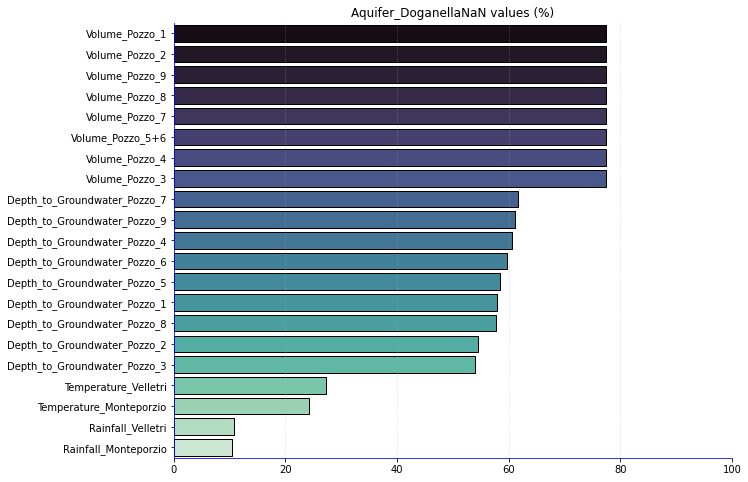

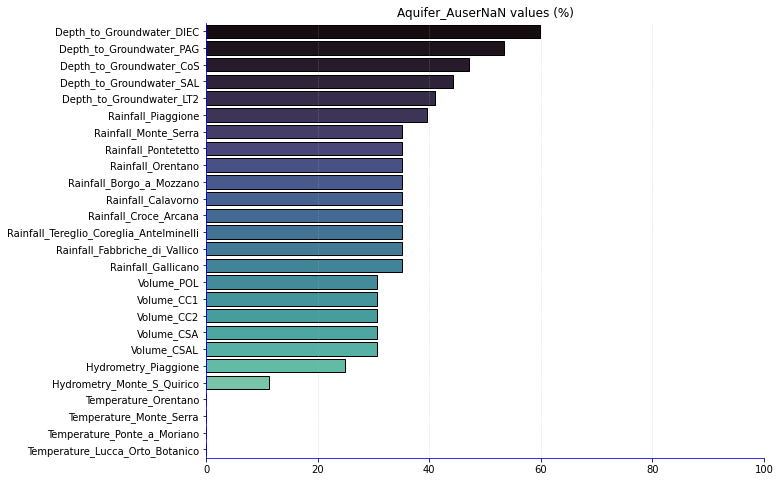

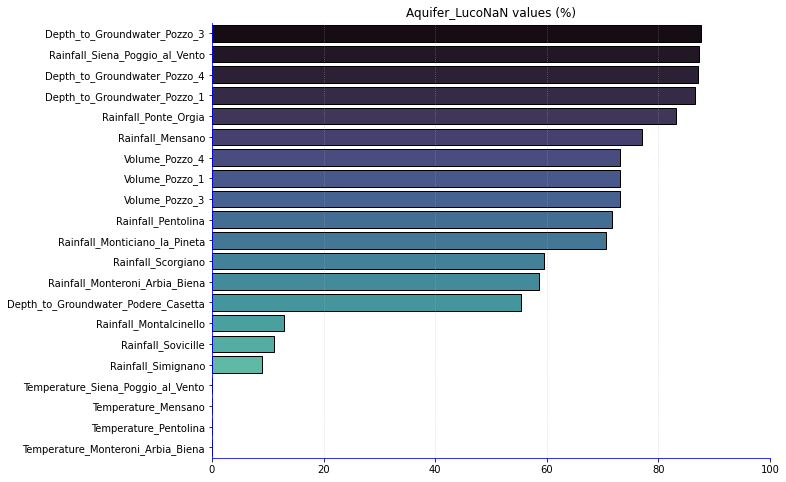

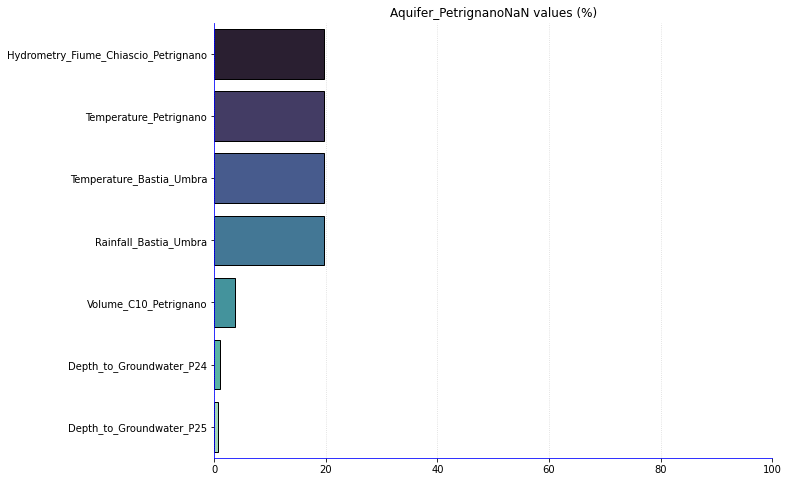

In [31]:
for i in range(len(Aquifer)):
    NaN_values = (Aquifer[i].isnull().sum() / len(Aquifer[i]) * 100).sort_values(ascending = False)
    bar_plot(x = NaN_values, 
             y = NaN_values.index,
             title = Aquifer_names[i] + 'NaN values (%)',
             palette_len = NaN_values.index, 
             xlim = (0, 100), 
             xticklabels = range(0, 101, 20),
             yticklabels = NaN_values.index,
             left_visible = True,
             figsize = (10, 8), axis_grid = 'x')

Uncomment the below line of code and run!

It may take some time

Aquifer_Doganella ******************************


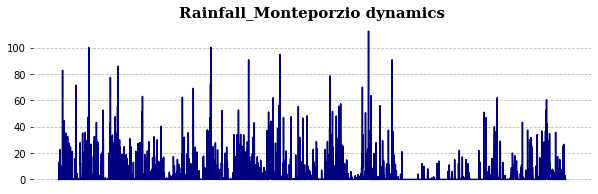

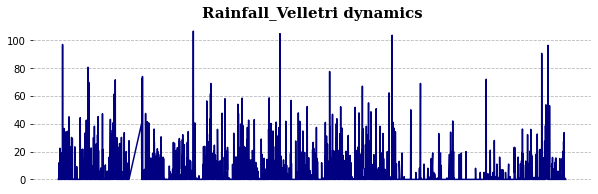

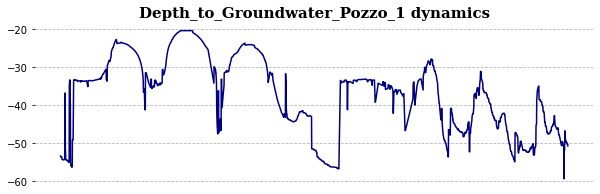

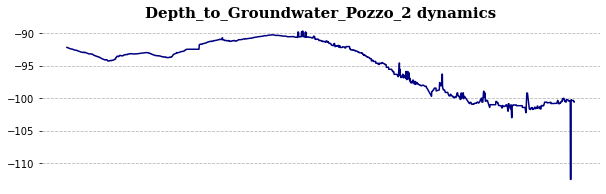

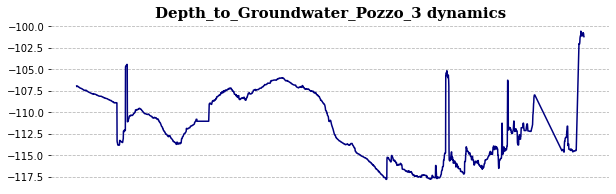

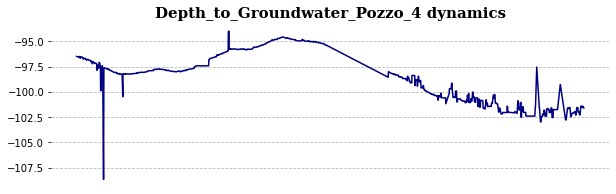

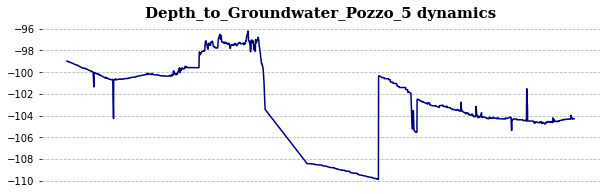

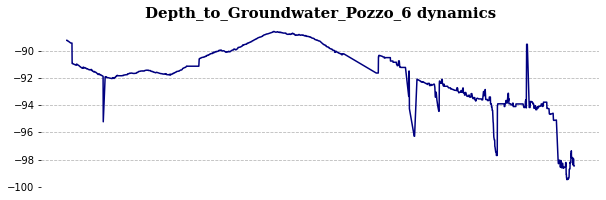

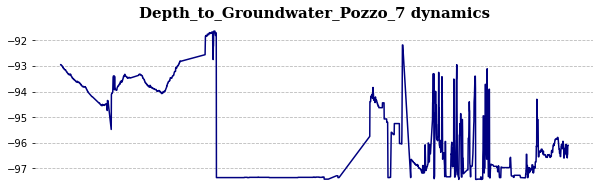

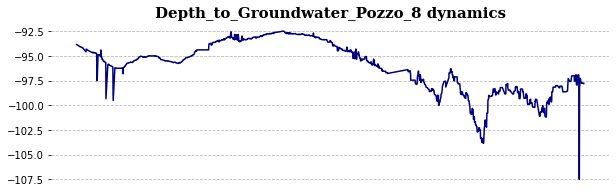

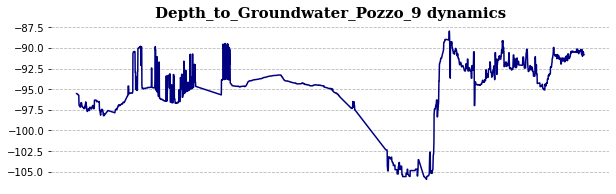

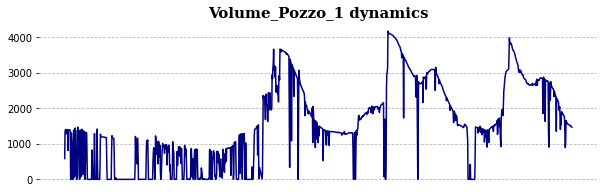

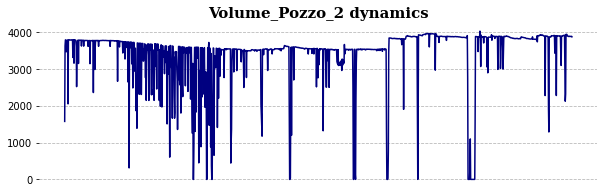

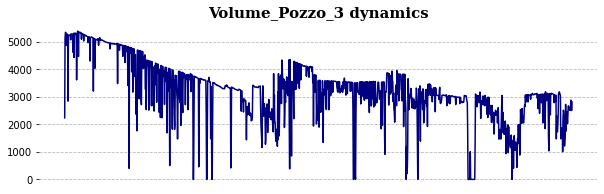

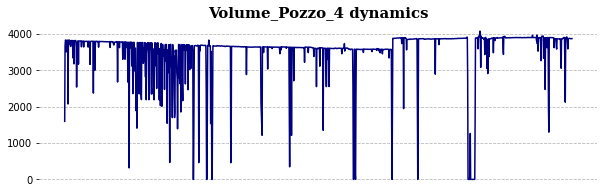

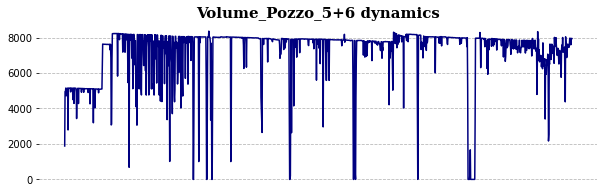

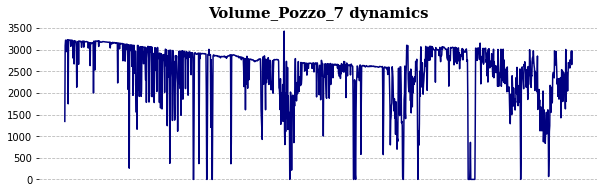

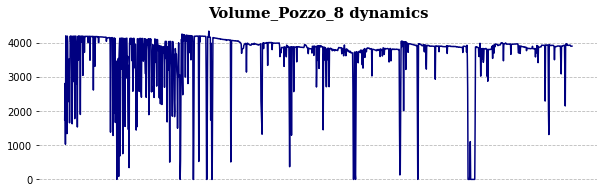

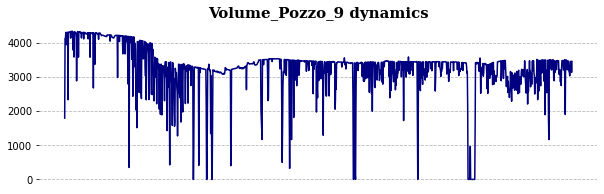

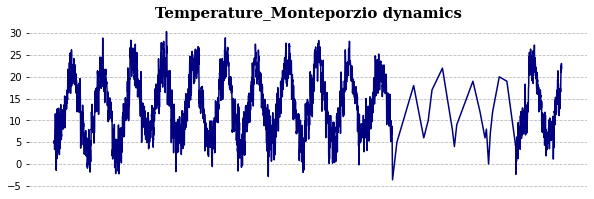

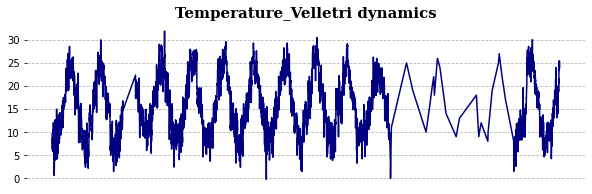

******************************
Aquifer_Auser ******************************


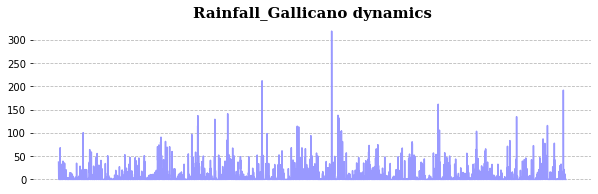

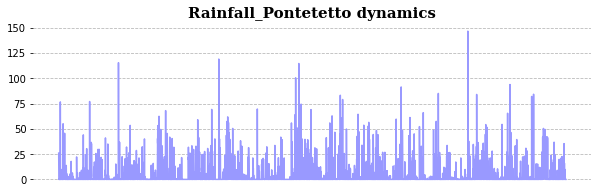

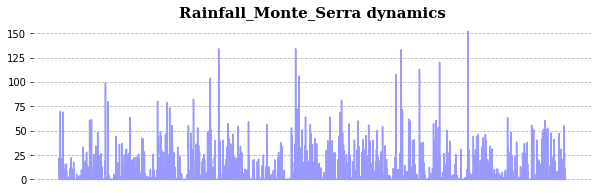

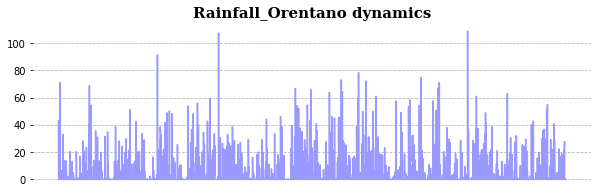

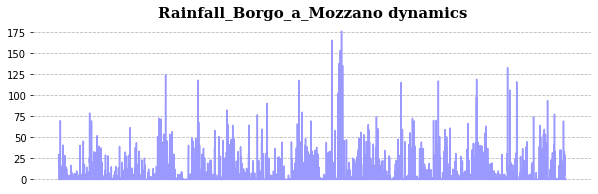

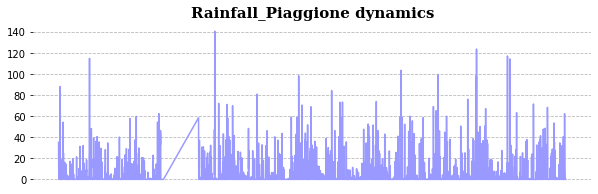

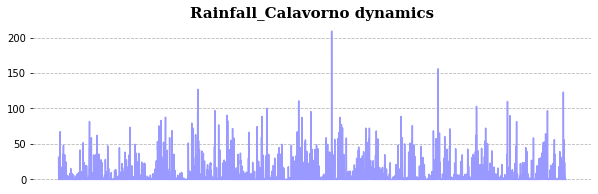

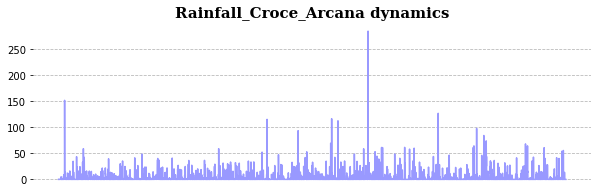

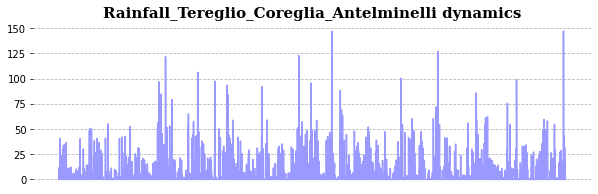

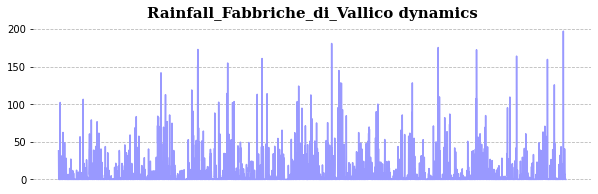

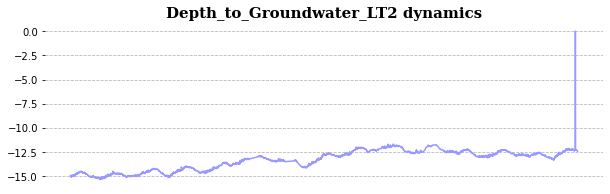

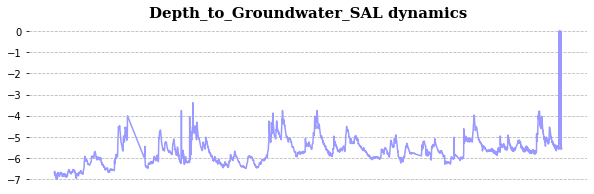

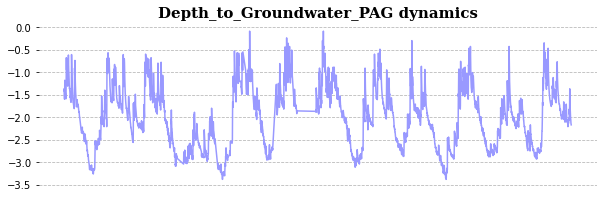

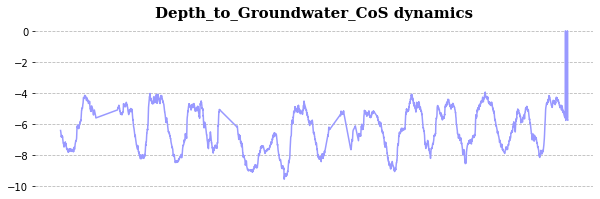

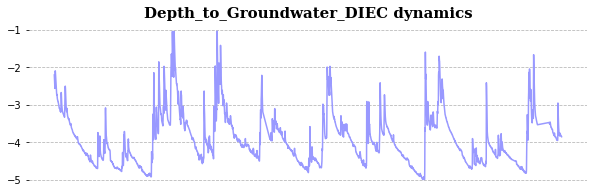

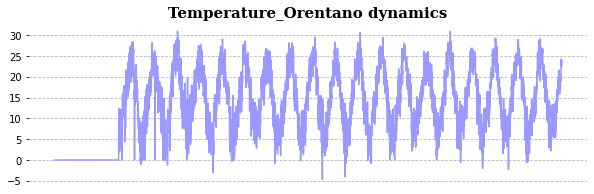

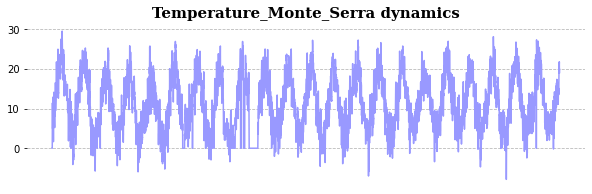

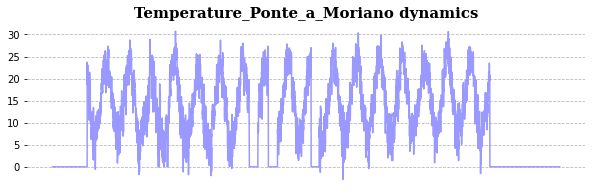

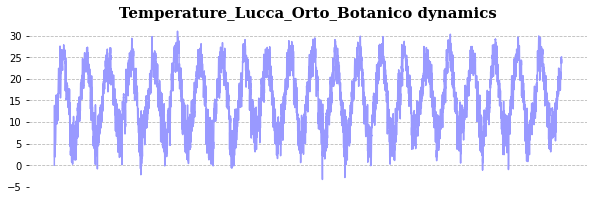

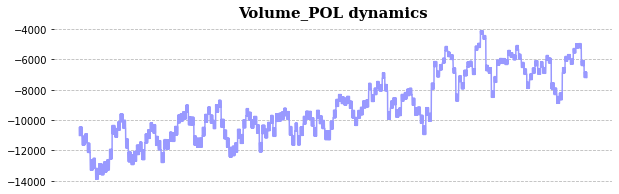

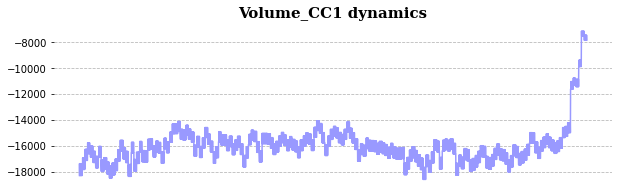

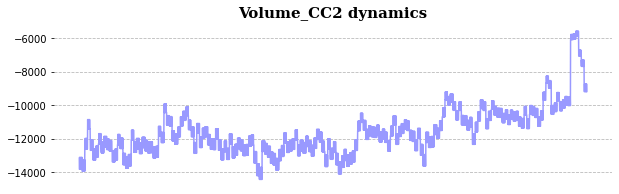

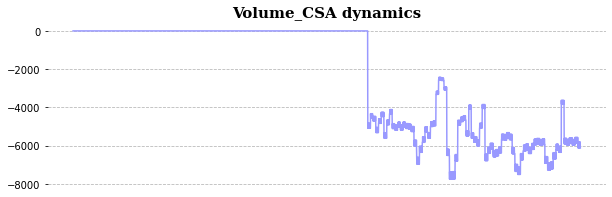

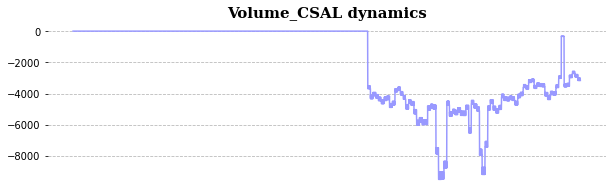

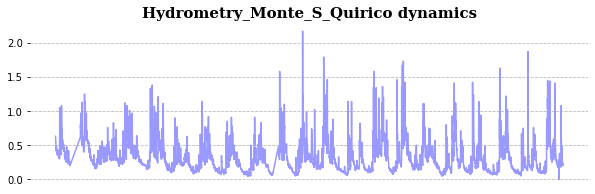

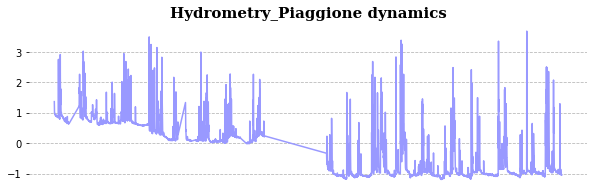

******************************
Aquifer_Luco ******************************


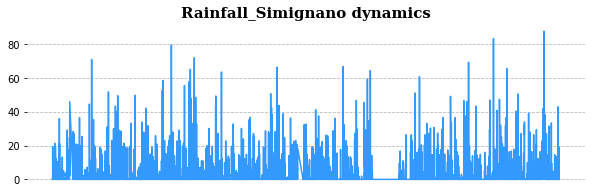

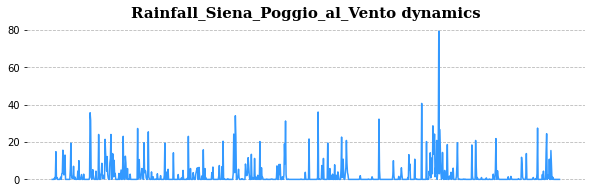

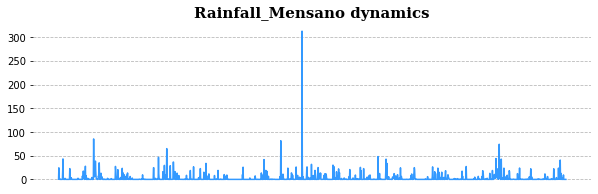

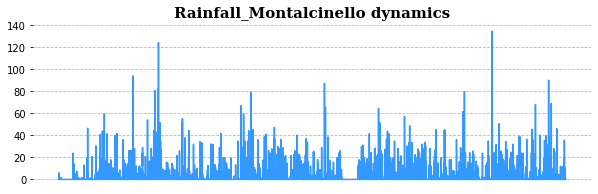

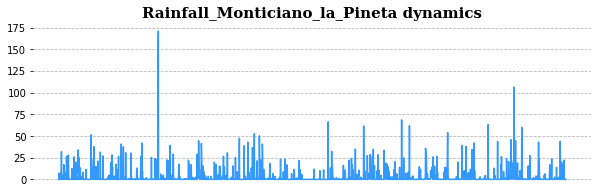

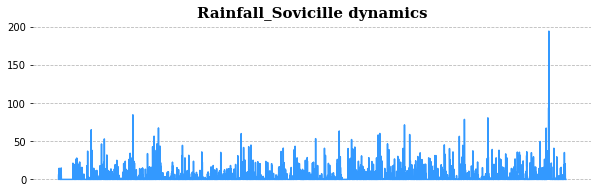

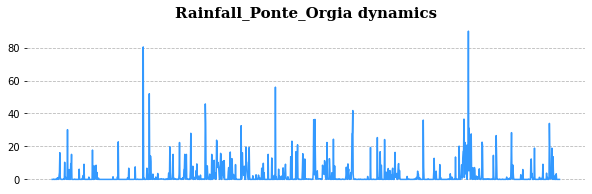

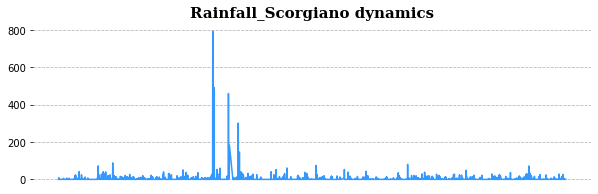

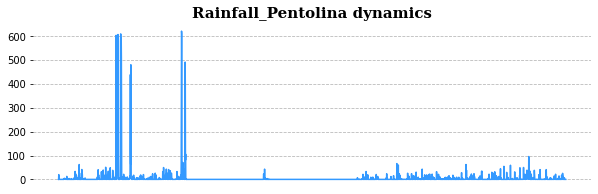

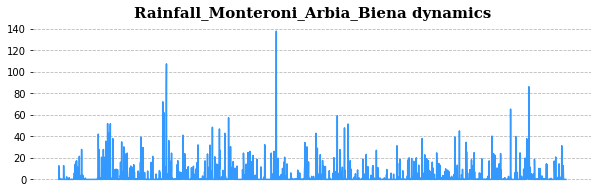

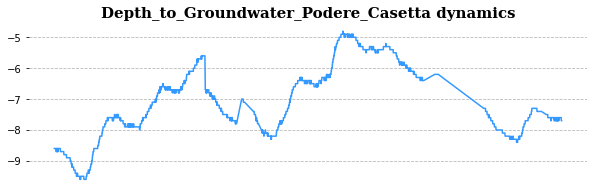

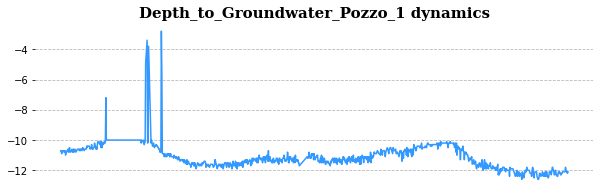

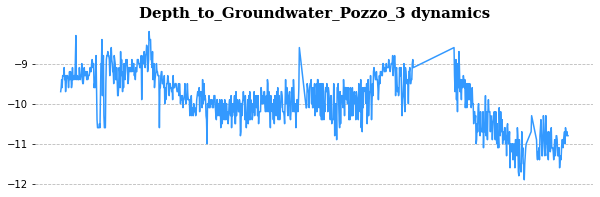

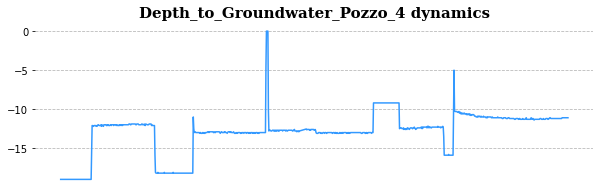

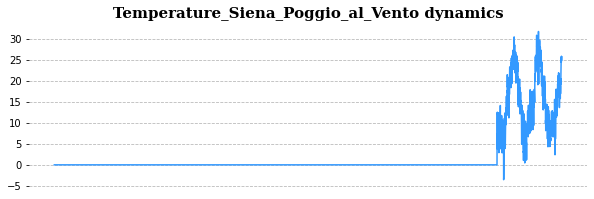

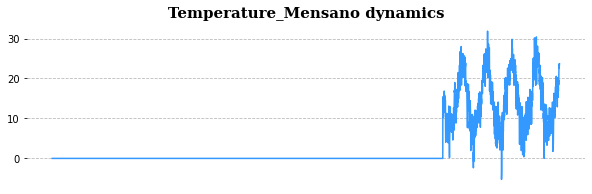

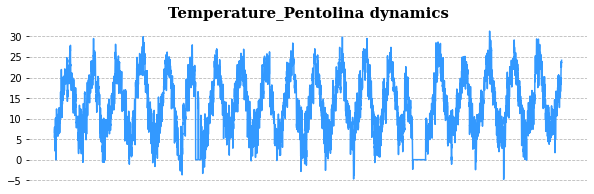

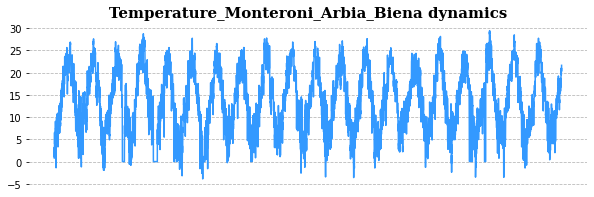

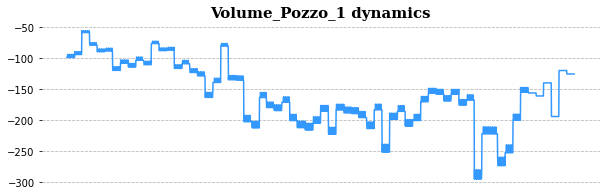

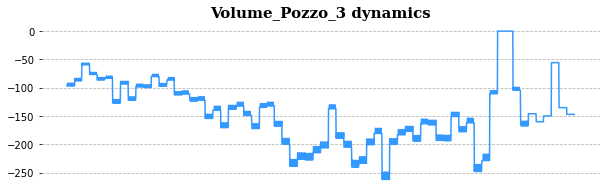

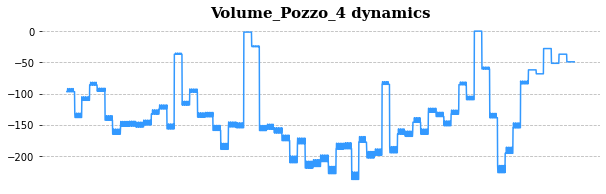

******************************
Aquifer_Petrignano ******************************


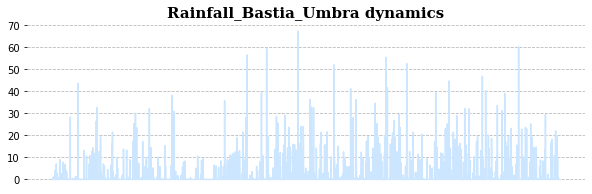

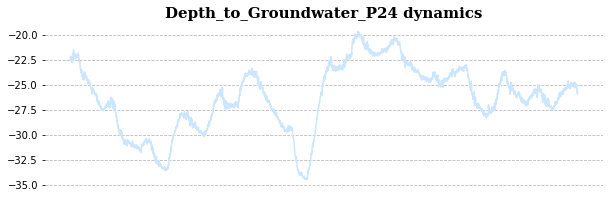

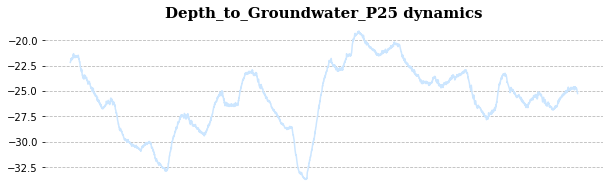

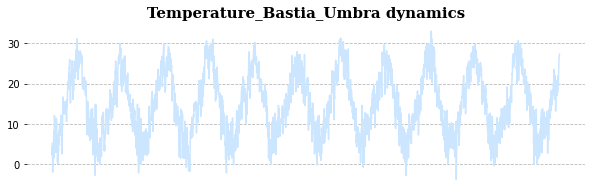

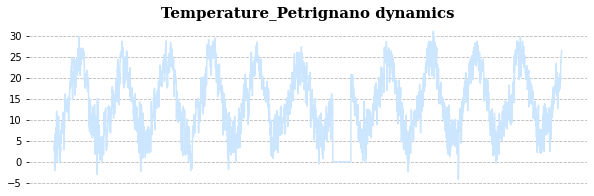

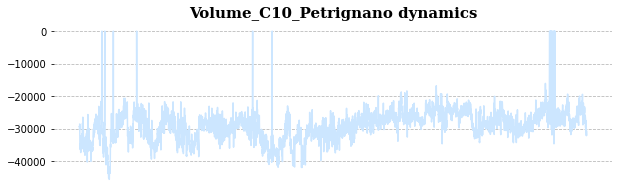

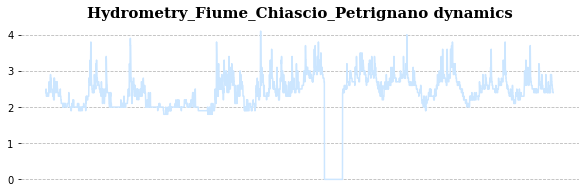

******************************


In [32]:
for i in range(len(Aquifer)):
    print(Aquifer_names[i],'*'*30)
    columns_viz(Aquifer[i], color = colors[i])
    print('*'*30)

Aquifer_Doganella ******************************


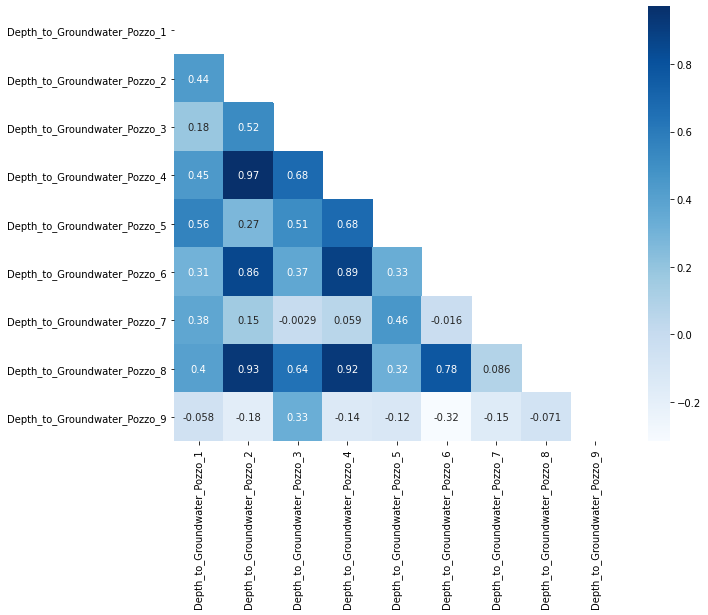

******************************
Aquifer_Auser ******************************


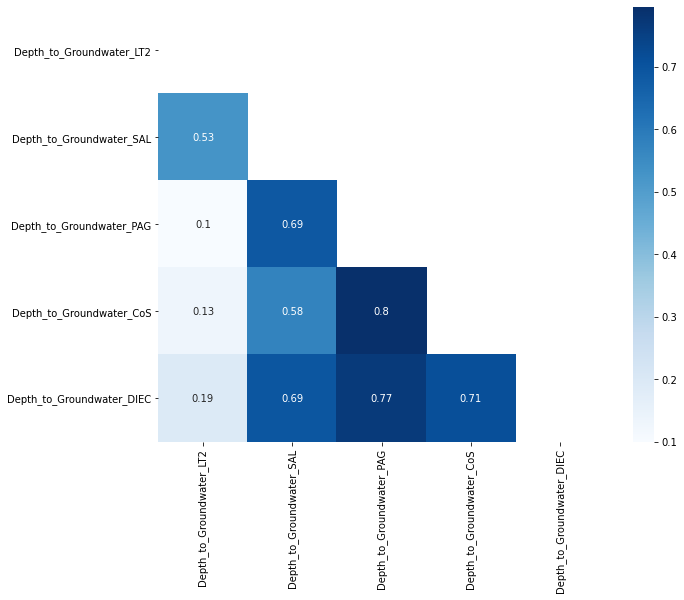

******************************
Aquifer_Luco ******************************


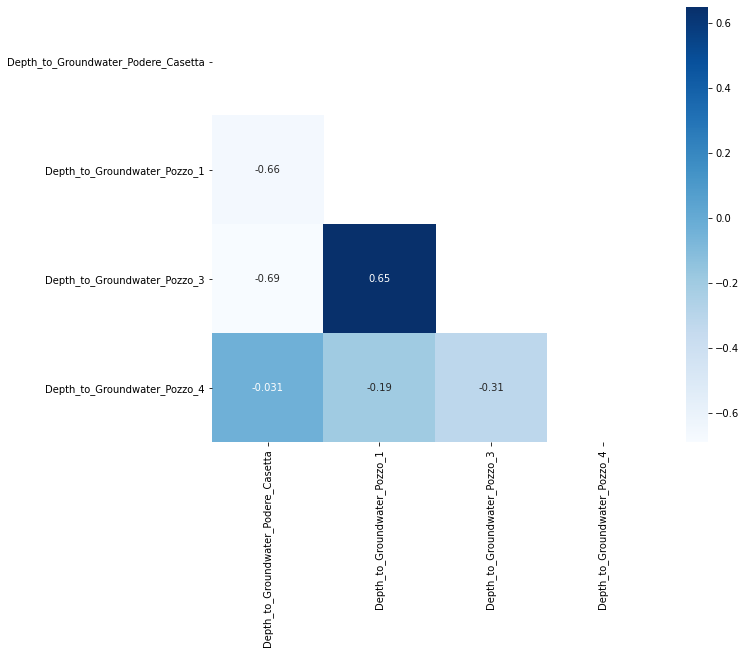

******************************
Aquifer_Petrignano ******************************


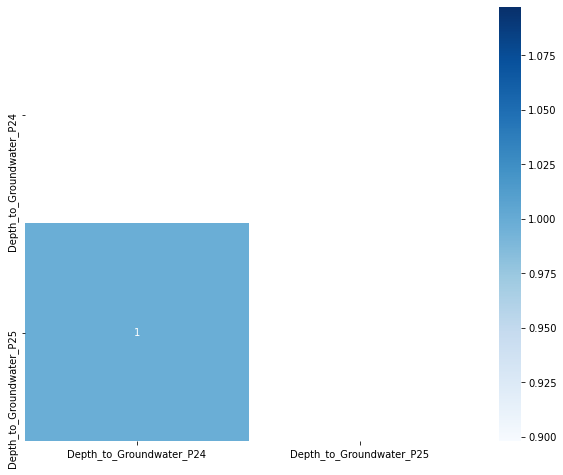

******************************


In [33]:
for i in range(len(Aquifer)):
    print(Aquifer_names[i],'*'*30)
    corr_plot(Aquifer[i], x="^Depth_to_Groundwater")
    print('*'*30)

Since there is only one lake, we will not make any List or List_names


In [34]:
Lake_Bilancino.head(3)

,Rainfall_S_Piero,Rainfall_Mangona,Rainfall_S_Agata,Rainfall_Cavallina,Rainfall_Le_Croci,Temperature_Le_Croci,Lake_Level,Flow_Rate
Date,,,,,,,,
03/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
04/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
05/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31


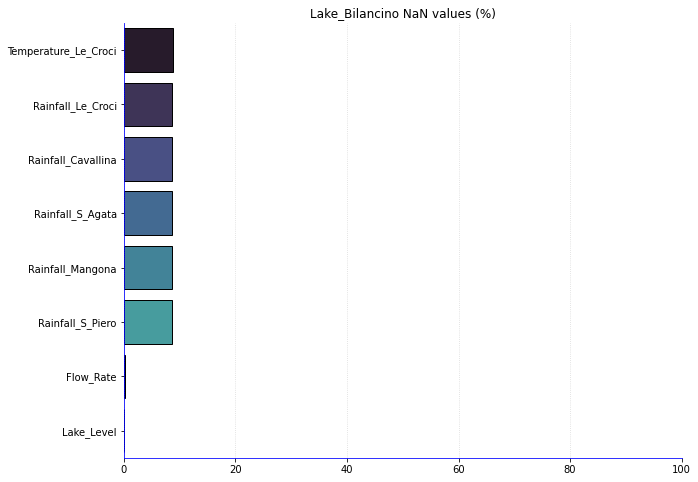

In [35]:
NaN_values = (Lake_Bilancino.isnull().sum() / len(Lake_Bilancino) * 100).sort_values(ascending = False)
bar_plot(x = NaN_values, 
 y = NaN_values.index,
 title = 'Lake_Bilancino NaN values (%)',
 palette_len = NaN_values.index, 
 xlim = (0, 100), 
 xticklabels = range(0, 101, 20),
 yticklabels = NaN_values.index,
 left_visible = True,
 figsize = (10, 8), axis_grid = 'x')

River

In [36]:
River_Arno.head(3)

,Rainfall_Le_Croci,Rainfall_Cavallina,Rainfall_S_Agata,Rainfall_Mangona,Rainfall_S_Piero,Rainfall_Vernio,Rainfall_Stia,Rainfall_Consuma,Rainfall_Incisa,Rainfall_Montevarchi,Rainfall_S_Savino,Rainfall_Laterina,Rainfall_Bibbiena,Rainfall_Camaldoli,Temperature_Firenze,Hydrometry_Nave_di_Rosano
Date,,,,,,,,,,,,,,,,
01/01/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.82
02/01/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.94
03/01/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.11


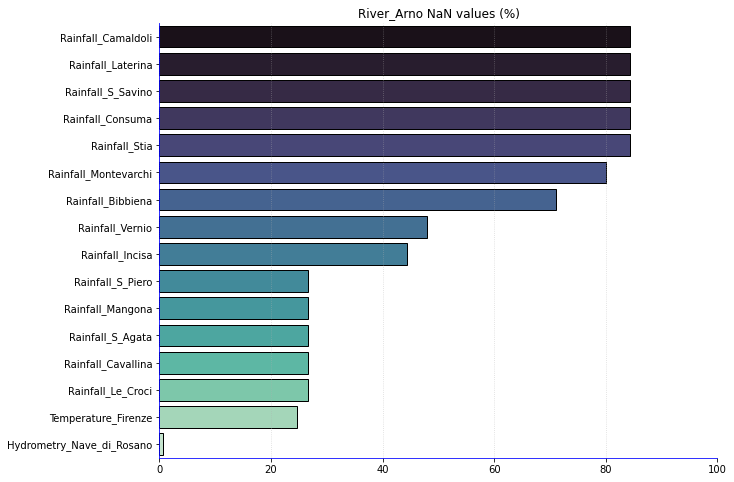

In [37]:
NaN_values = (River_Arno.isnull().sum() / len(River_Arno) * 100).sort_values(ascending = False)
bar_plot(x = NaN_values, 
 y = NaN_values.index,
 title = 'River_Arno NaN values (%)',
 palette_len = NaN_values.index, 
 xlim = (0, 100), 
 xticklabels = range(0, 101, 20),
 yticklabels = NaN_values.index,
 left_visible = True,
 figsize = (10, 8), axis_grid = 'x')

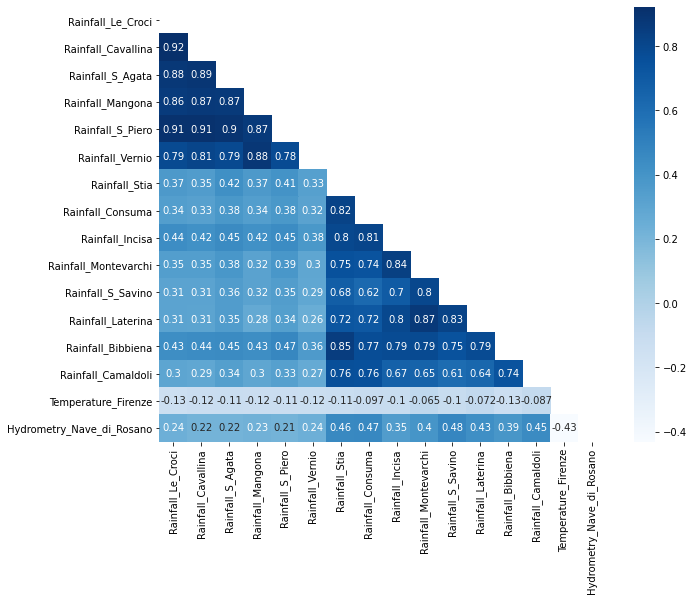

In [38]:
corr_plot(River_Arno, x="")

Water Spring

In [39]:
Springs = [Water_Spring_Amiata,  Water_Spring_Madonna_di_Canneto, Water_Spring_Lupa]
Springs_names =['Water_Spring_Amiata',  'Water_Spring_Madonna_di_Canneto', 'Water_Spring_Lupa']

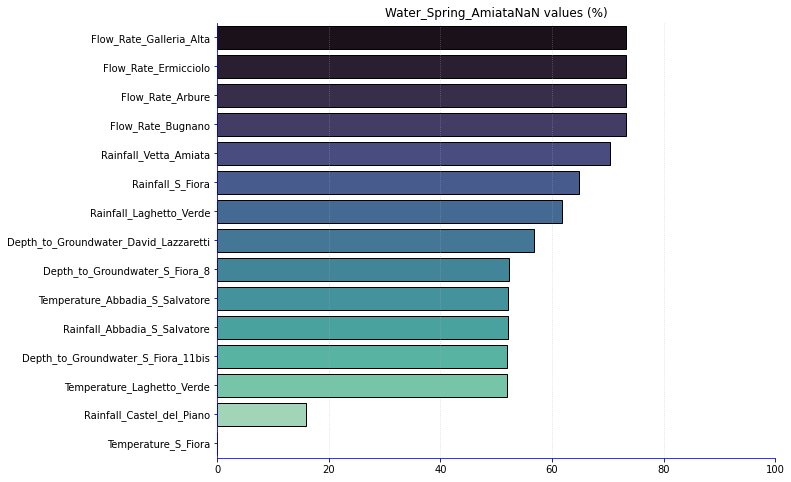

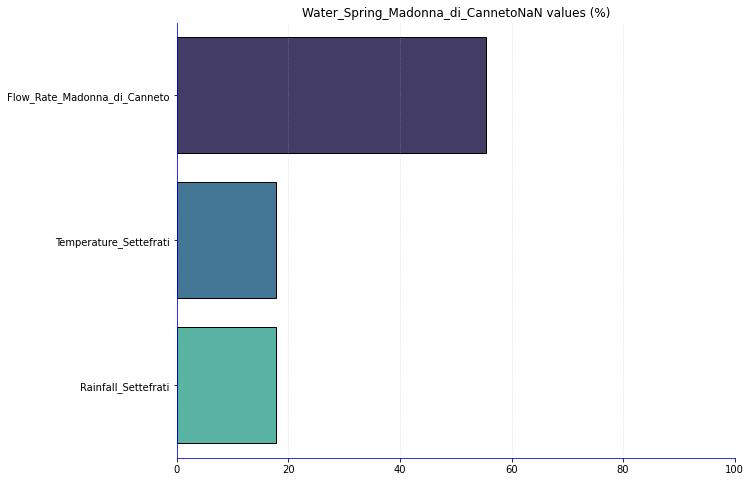

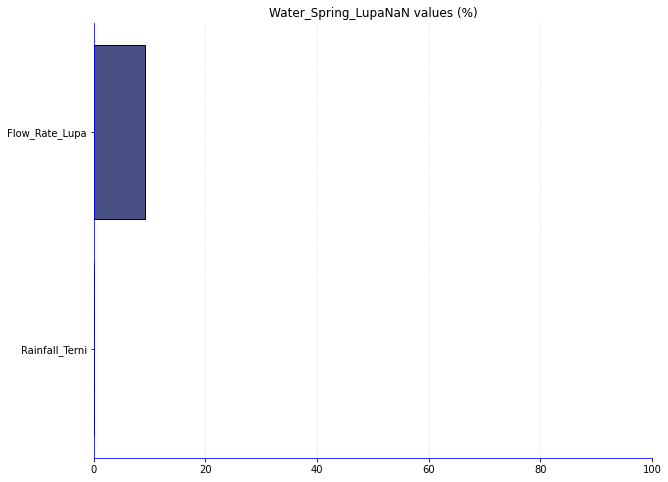

In [40]:
for i in range(len(Springs)):
    NaN_values = (Springs[i].isnull().sum() / len(Springs[i]) * 100).sort_values(ascending = False)
    bar_plot(x = NaN_values, 
             y = NaN_values.index,
             title = Springs_names[i] + 'NaN values (%)',
             palette_len = NaN_values.index, 
             xlim = (0, 100), 
             xticklabels = range(0, 101, 20),
             yticklabels = NaN_values.index,
             left_visible = True,
             figsize = (10, 8), axis_grid = 'x')

Water_Spring_Amiata ******************************


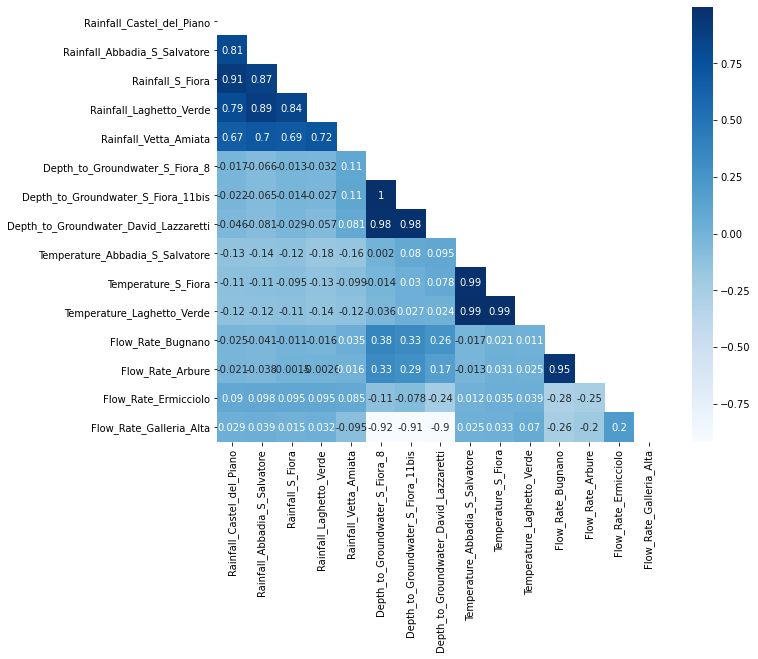

******************************
Water_Spring_Madonna_di_Canneto ******************************


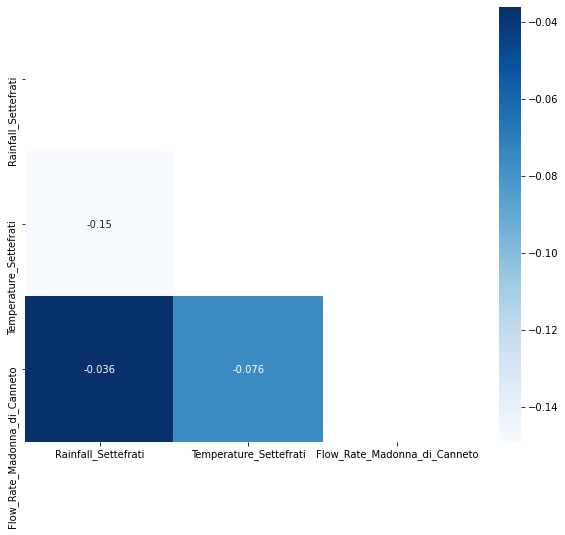

******************************
Water_Spring_Lupa ******************************


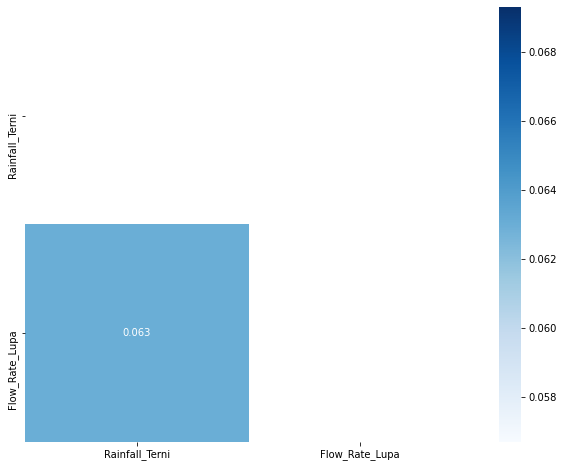

******************************


In [41]:
for i in range(len(Springs)):
    print(Springs_names[i],'*'*30)
    corr_plot(Springs[i], x="")
    print('*'*30)